# Monte Carlo Simulation for Qubit to Shor's Algorithm

In [18]:
!pip install numpy matplotlib scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.4/22.4 MB 62.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


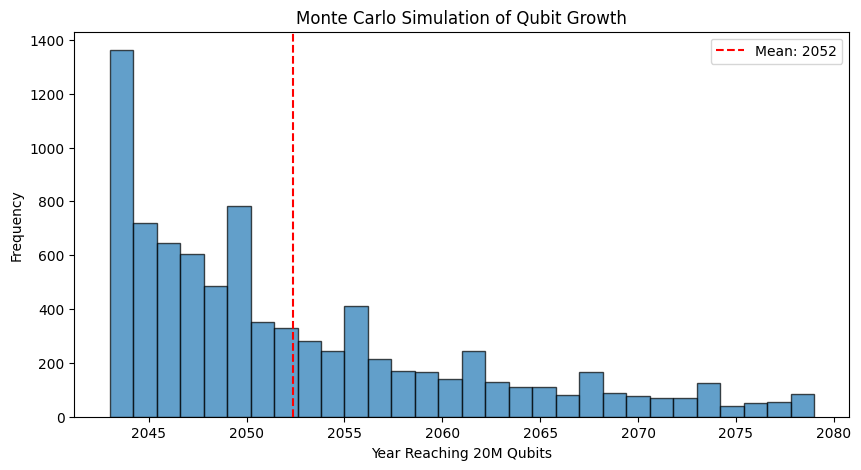

Expected year to reach 20M qubits: 2052 (±8.8 years)


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import truncnorm

years = np.array([2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023])
qubits = np.array([5, 49, 72, 72, 76, 127, 433, 1180])

r_estimates = np.log(qubits[1:] / qubits[:-1])  
r_mean, r_std = np.mean(r_estimates), np.std(r_estimates)

n_simulations = 10_000  
target_qubits = 20_000_000 
start_year = years[-1] 
max_years = 2080

def truncated_normal(mean, std, lower, upper, size=1):
    return truncnorm.rvs((lower - mean) / std, (upper - mean) / std, loc=mean, scale=std, size=size)

predicted_years = []

for _ in range(n_simulations):
    r_sim = truncated_normal(r_mean, r_std / 2, 0.01, 0.5) 
    qubits_sim = qubits[-1]
    year = start_year

    while qubits_sim < target_qubits and year < max_years:
        qubits_sim *= np.exp(r_sim)
        year += 1

    if year < max_years: 
        predicted_years.append(year)

plt.figure(figsize=(10,5))
plt.hist(predicted_years, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(np.mean(predicted_years), color='red', linestyle='dashed', label=f"Mean: {np.mean(predicted_years):.0f}")
plt.xlabel("Year Reaching 20M Qubits")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulation of Qubit Growth")
plt.legend()
plt.show()

print(f"Expected year to reach 20M qubits: {np.mean(predicted_years):.0f} (±{np.std(predicted_years):.1f} years)")

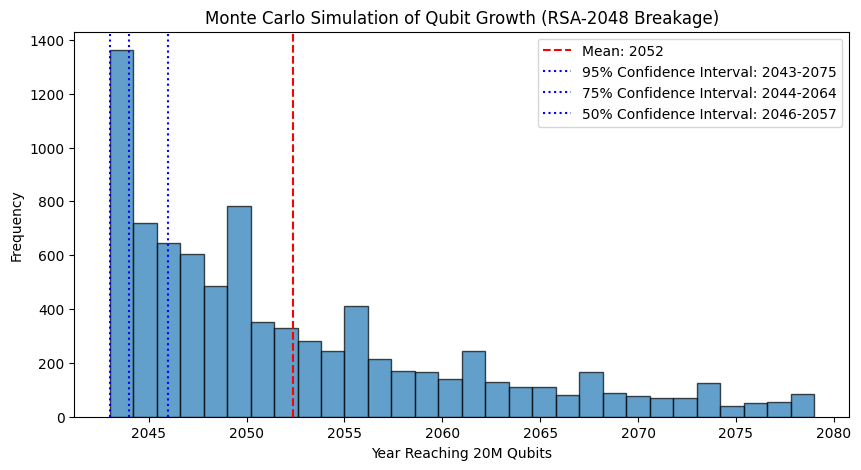

Mean predicted year to reach 20M qubits: 2052
95% Confidence Interval: 2043-2075
75% Confidence Interval: 2044-2064
50% Confidence Interval: 2046-2057


In [32]:
predicted_years = np.array(predicted_years)

conf_levels = [95, 75, 50]

lower_percentiles = np.percentile(predicted_years, [(100 - level) / 2 for level in conf_levels])
upper_percentiles = np.percentile(predicted_years, [100 - (100 - level) / 2 for level in conf_levels])

plt.figure(figsize=(10, 5))
plt.hist(predicted_years, bins=30, edgecolor='black', alpha=0.7)
plt.axvline(np.mean(predicted_years), color='red', linestyle='dashed', label=f"Mean: {np.mean(predicted_years):.0f}")
plt.xlabel("Year Reaching 20M Qubits")
plt.ylabel("Frequency")
plt.title("Monte Carlo Simulation of Qubit Growth (RSA-2048 Breakage)")
plt.legend()

for i, level in enumerate(conf_levels):
    plt.axvline(lower_percentiles[i], color='blue', linestyle='dotted', label=f"{level}% Confidence Interval: {int(lower_percentiles[i])}-{int(upper_percentiles[i])}")

plt.legend()
plt.show()

print(f"Mean predicted year to reach 20M qubits: {np.mean(predicted_years):.0f}")
for i, level in enumerate(conf_levels):
    print(f"{level}% Confidence Interval: {int(lower_percentiles[i])}-{int(upper_percentiles[i])}")